In [7]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('../Data/Yahoo Ticker Symbols - September 2017.xlsx')

In [9]:
columns = ['Ticker','Name','Exchange','Category Name','Country']

In [10]:
df = pd.DataFrame(data = df.iloc[3:].values,columns=df.iloc[2].values).loc[:,columns]

In [11]:
big_tech_tickers  ={'AAPL':'Apple Inc.','AMZN':'Amazon.com, Inc.','MSFT':'Microsoft Corporation',
                    'BABA':'Alibaba Group Holding Limited',
                    'FB':'Facebook, Inc.','GOOG':'Alphabet Inc.','TCTZF':'Tencent Holdings Limited'
                    ,'BIDU':'Baidu, Inc.'}

In [12]:
df = df.dropna(subset=['Name'])

In [13]:
df[df.Name.str.contains('Baidu')]

,Ticker,Name,Exchange,Category Name,Country
2026,BIDU,"Baidu, Inc.",NMS,Internet Information Providers,USA
14618,K3SD.SI,"Baidu, Inc.",SES,NaN,Singapore
20664,BIDUN.MX,"Baidu, Inc.",MEX,Internet Information Providers,Mexico
21674,B1C.F,"Baidu, Inc.",FRA,Internet Information Providers,France
30617,BIDU.SW,"Baidu, Inc.",EBS,NaN,Switzerland
30964,B1C.SG,Baidu Inc. R.Shs A(Sp.ADRs)1/10,STU,Internet Information Providers,Germany
102813,B1C.DE,"Baidu, Inc.",GER,Internet Information Providers,Germany


In [14]:
def get_stock_history(symbol,period='10y',name=None):
    
    if name: 
        df = (
            yf.Ticker(symbol).history(period=period)
            .assign(Ticker=symbol)
            .assign(Name=name)
        )
    else:
        df = (
            yf.Ticker(symbol).history(period=period)
            .assign(Ticker=symbol)
        )
    
    return df

In [15]:
def get_multiple_stock_history(ticker_dict):
    df = pd.DataFrame(columns = get_stock_history(list(ticker_dict.keys())[0]).columns)
    for key,name in ticker_dict.items():
        df= pd.concat((df, get_stock_history(key,period='3mo',name=name)))
    df['Date'] = df.index
    df =df.reset_index(drop=True)
    return df

In [16]:
df = get_multiple_stock_history(big_tech_tickers)

In [17]:
df['Close'] = (
    df.groupby('Name')
    .Close
    .apply(lambda x: x/x.max())
)

In [18]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Name,Date
0,309.86,311.93,307.52,0.946210,35161200,0.0,0,AAPL,Apple Inc.,2020-01-10
1,310.90,316.32,310.41,0.966412,30383000,0.0,0,AAPL,Apple Inc.,2020-01-13
2,315.95,316.82,311.43,0.953362,40488600,0.0,0,AAPL,Apple Inc.,2020-01-14
3,311.11,314.75,308.82,0.949267,30480900,0.0,0,AAPL,Apple Inc.,2020-01-15
4,312.85,314.95,311.35,0.961155,27207300,0.0,0,AAPL,Apple Inc.,2020-01-16
...,...,...,...,...,...,...,...,...,...,...
499,98.92,100.23,96.10,0.672618,2239700,0.0,0,BIDU,"Baidu, Inc.",2020-04-03
500,100.88,103.20,100.27,0.712338,3590800,0.0,0,BIDU,"Baidu, Inc.",2020-04-06
501,105.00,107.39,101.05,0.704380,6968600,0.0,0,BIDU,"Baidu, Inc.",2020-04-07
502,98.00,98.59,94.90,0.673517,10164500,0.0,0,BIDU,"Baidu, Inc.",2020-04-08


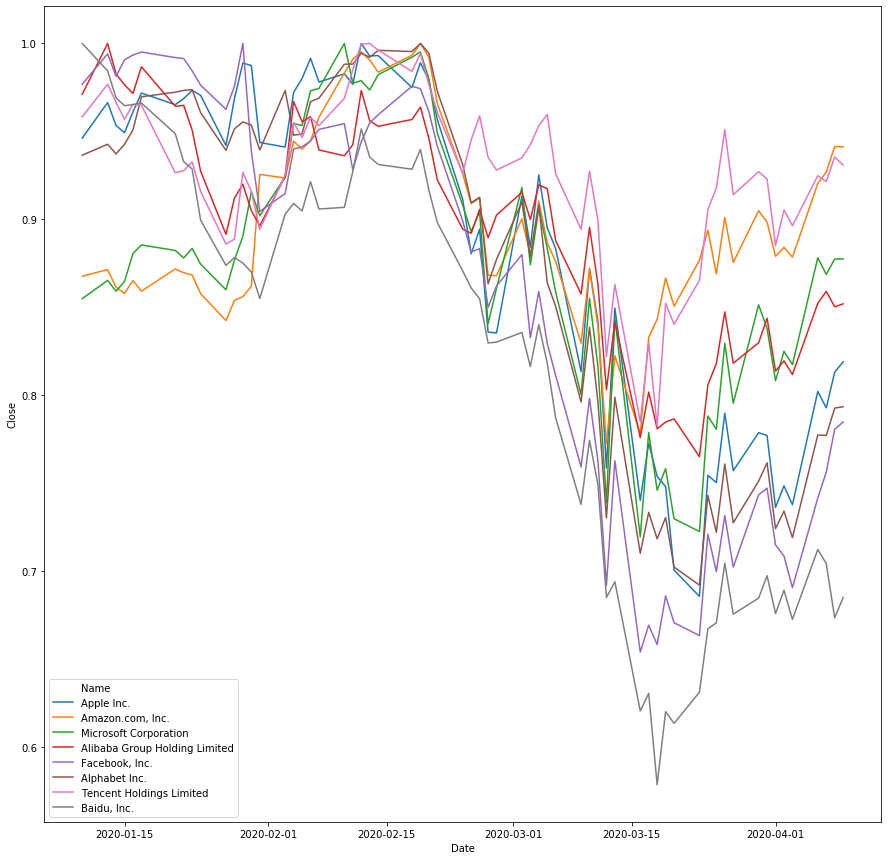

In [19]:
figure = plt.figure(figsize=(15,15))
sns.lineplot(data=df,hue='Name',x='Date',y='Close')